In [16]:
%cd ../src
from loader import * 
from datasets import *
from vis_utils import *
from utils import *
from stats import * 
from logs import logger
import logs,datasets,vis_utils,loader
# logger.setLevel(logs.WARN)
%load_ext autoreload
%autoreload 0.1
matplotlib.style.use('ggplot')
%matplotlib inline

/home/wangxinglu/prj/Perf_Pred/src
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
t=read_df('../stdtime/vgg6_cifar10_with_bn_True_runtime_1_lr_1.00e-02/stdtime.h5')

t2=read_df('../stdtime/vgg6_cifar10_with_bn_True_runtime_1_lr_1.00e-02/stdtime.h5')

In [33]:
arr=t
cap=9
for name,series in arr.iteritems():
    tensor= series.iloc[0]
    if 'act' not in name: continue
    if 'input' in name or 'batchnorma' in name :continue 
    print name,tensor.shape,tensor.min(),tensor.mean(),tensor.max()
    print tensor.ravel().argsort()[-cap:][::-1]

layer1/conv2d/act (272, 32, 32, 32) 0.000195344575392 0.0602831793208 0.612967853452
[7868392  501736 2597864 7867368 2598888 3587048 4482024 7869416 3588072]
layer2/conv2d/act (272, 32, 32, 32) 0.0390685836917 0.418833851979 6.57128528226
[6379667 3588179 3772147 3587155 3771123 3773171 3770099 6378643 3589203]
layer3/conv2d/act (272, 16, 16, 64) 0.0563292493166 0.386550101428 2.97341696403
[ 581413  252517  580389 1299365 3934117 2453699 1799461 3959619 2269414]
layer4/conv2d/act (272, 16, 16, 64) 0.0723750649885 0.453183175245 2.76058036293
[2268338 2269426 2268402 2269362 2267314 2268289 2268274 2453809 2268225]
layer5/dense/act (272, 512) 0.161427838321 0.735049624095 3.47631246069
[52214 59894  2704 59869 69085 63990 69011 70941 59645]
layer6/dense/act (272, 10) 0.518567722354 1.79853242921 11.9081109798
[2071  696 1666 1981  616 2418  576 1571  888]
layer6/softmax/act (272, 10) 0.00211918978489 0.0534931899307 0.364731495669
[2383 1933 2386 1079 1917  669  913  980 1683]


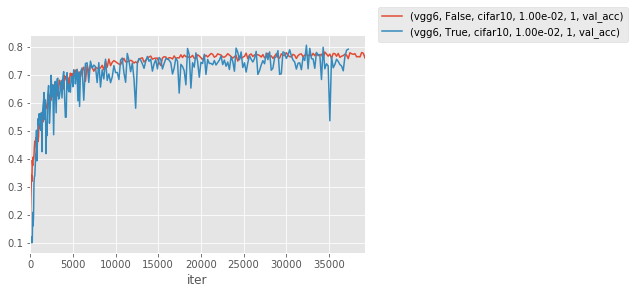

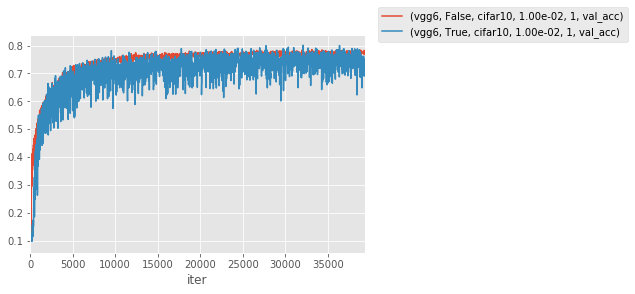

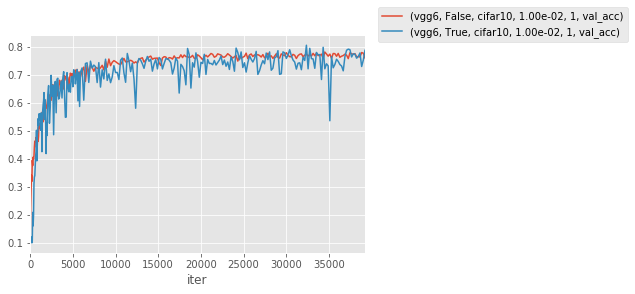

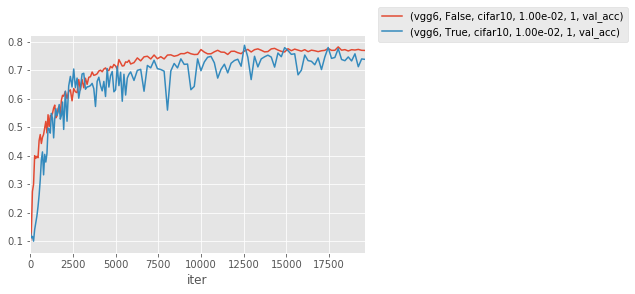

In [228]:
paranet_folders = ['bn','stdtime','stdtime2','stdtime3']
for paranet_folder in paranet_folders:
    visualizer = Visualizer(join='outer', stat_only=True, paranet_folder=paranet_folder)
    plt.figure()
    df=visualizer.perf_df.copy()
    from vis_utils import * 
    df=select(df,{'name':'val_acc','lr':'1.00e-02'},regexp=False)
    df.plot(legend=True)
    plt.legend(loc='right',bbox_to_anchor=(1.8, 1.05))

In [434]:
visualizer=Visualizer(paranet_folder='stdtime3')

df=visualizer.stat_df.copy()
indexf=MultiIndexFacilitate(df.unstack().index) 
df.shape
df=select(df,{'name':'.*example.*'})
df=select(df,{'name':'.*conv.*'})

df=select(df,{'name':'.*act.*'})

df_min=select(df,{'name':'.*min.*'})
df_max=select(df,{'name':'.*max.*'})

df_max.shape,df_min.shape

df_max=df_max.dropna(how='all').dropna(how='all',axis=1)
df_max.columns=[ ('/'.join(c[:])).strip('/') for c in df_max.columns]
df_min=df_min.dropna(how='all').dropna(how='all',axis=1)
df_min.columns=[ ('/'.join(c[:])).strip('/') for c in df_min.columns]

df_max.shape,df_min.shape

t=df_max.interpolate()+df_max.interpolate(limit_direction='backward') /2.
t.head()

((141, 4000), (141, 4000))

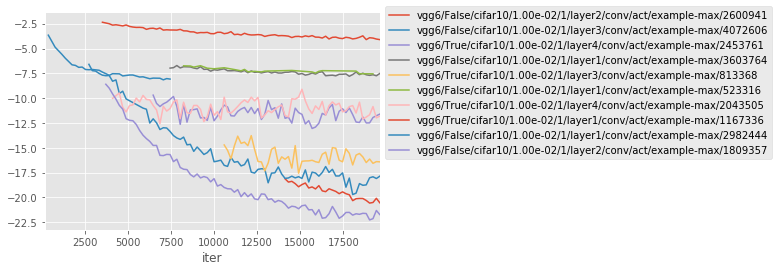

In [482]:
df_max.iloc[:,leng].iloc[:,:10].plot(legend=True)
plt.legend(bbox_to_anchor=(1.0,1.05))

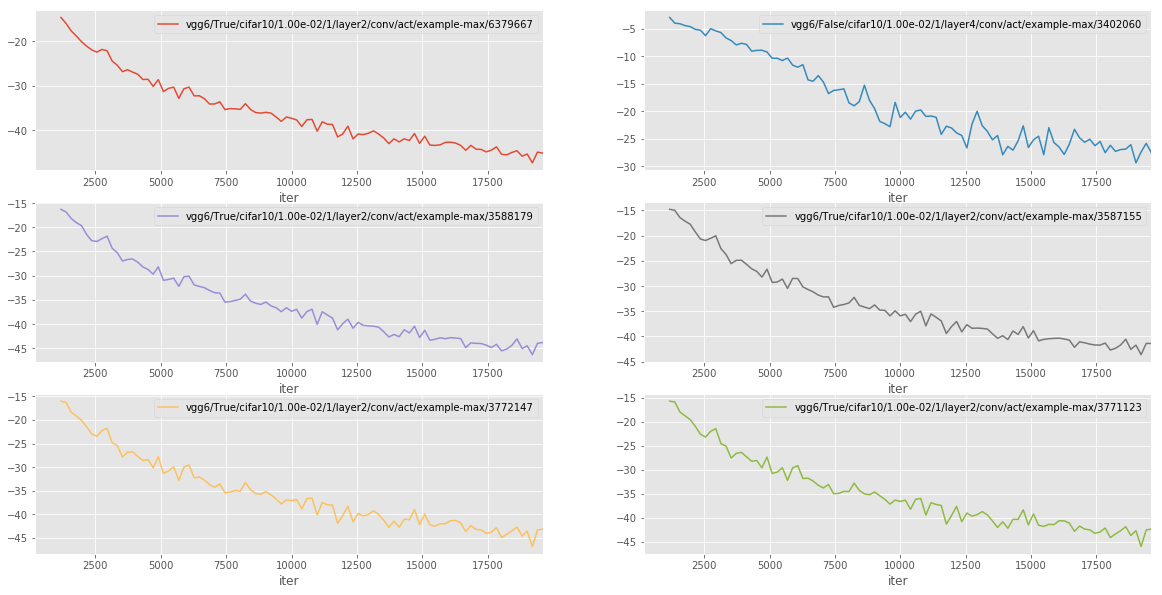

In [477]:
fig,axes=plt.subplots(3,2,figsize=(20,10))
column_ind=np.nanstd(df_max.values,axis=0).argsort()[-6:][::-1]
df_max.iloc[:,column_ind].plot(legend=True,subplots=True,ax=axes.flatten())
ax1=axes[0,0]
ax1.get_legend()
fig.savefig('tmp.png')

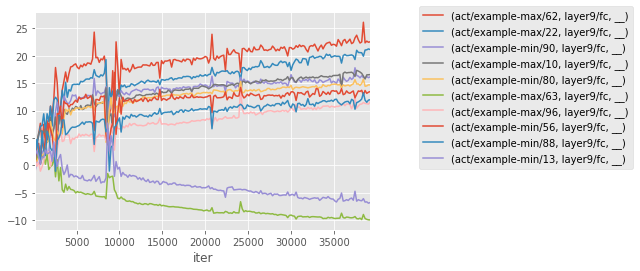

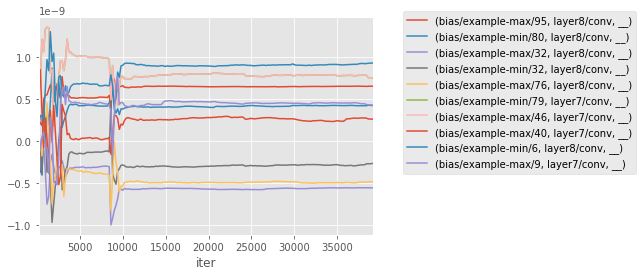

In [147]:
# df=df.xs(level='layer',key='layer1/conv',axis=1,drop_level=True)
std_l=[]
for name,series in df.iteritems():
    std_l.append(series.std()) 
stds=np.array(std_l)


inds=np.argsort(stds)[-10:][::-1] 
plt.figure()
df.iloc[:,inds].plot()

plt.legend(bbox_to_anchor=(1.8,1.05))

inds=np.argsort(stds)[:10]
plt.figure()
df.iloc[:,inds].plot()
plt.legend(bbox_to_anchor=(1.8,1.05))


In [2]:
visualizer = Visualizer(paranet_folder='all')

df = visualizer.stat_df.copy() 
df = split_layer_stat(df)
df.head()



df = visualizer.stat_df.copy()
df = split_layer_stat(df)
# df = select(df, {'model_type': 'vgg16'})
# df = exclude(df, {'name': '.*example.*'})
# df = select(df,{'optimizer':'lr_0.001_name_sgd'},regexp=False)
df = select(df,{'model_type':'resnet10','stat':'.*act.*','with_bn':'True'})
df = exclude(df,{'layer':'.*fc.*'})
df.head()

t=df.copy()
t=t.iloc[:10,:]
# t,super_title=drop_level(t)
# super_title
path=auto_plot(t,('layer','stat','_'))
# print path
show_pdf(path[0])

df = visualizer.stat_df.copy()
df = split_layer_stat(df)
df = select(df,{'model_type':'vgg10','stat':'.*act.*'})
df = exclude(df,{'layer':'.*fc.*'})
df.head()

t=df.copy()
# t=t.iloc[:10,:]

path=auto_plot(t,('layer','stat','with_bn'),path_suffix='with_without_bn')
print path
show_pdf(path[0])



2017-08-14 17:27:44,665 - loader.py - [line:248] - INFO - load scalars consume 0.0278789997101
2017-08-14 17:27:44,673 - loader.py - [line:248] - INFO - load scalars consume 0.00684380531311
2017-08-14 17:27:44,679 - loader.py - [line:248] - INFO - load scalars consume 0.00493693351746
2017-08-14 17:27:44,685 - loader.py - [line:248] - INFO - load scalars consume 0.0045850276947


In [157]:
visualizer = Visualizer('lr_search')
df=visualizer.stat_df.copy() 
df = split_layer_stat(df)
df = select(df,{'model_type':'vgg10'})
# df = select(df,{'':'vgg10'})
df.head()



visualizer = Visualizer('ortho')
df=visualizer.stat_df.copy() 
df = split_layer_stat(df)
# df = select(df,{'model_type':'vgg10'})
df = select(df,{'stat':'.*ortho.*'})
# df=exclude(df,{'layer':'.*bn.*'})
# df=exclude(df,{'layer':'.*add.*'})
df=exclude(df,{'stat':'.*gamma.*'})
df.head()

auto_plot(df)





2017-08-15 19:32:51,038 - loader.py - [line:248] - INFO - load scalars consume 0.00553107261658
2017-08-15 19:32:51,044 - loader.py - [line:248] - INFO - load scalars consume 0.00514984130859
2017-08-15 19:32:51,049 - loader.py - [line:248] - INFO - load scalars consume 0.00439715385437
2017-08-15 19:32:51,055 - loader.py - [line:248] - INFO - load scalars consume 0.00529909133911
2017-08-15 19:32:51,061 - loader.py - [line:248] - INFO - load scalars consume 0.00492906570435
2017-08-15 19:32:51,066 - loader.py - [line:248] - INFO - load scalars consume 0.00472497940063
2017-08-15 19:32:51,072 - loader.py - [line:248] - INFO - load scalars consume 0.00468683242798
2017-08-15 19:32:51,078 - loader.py - [line:248] - INFO - load scalars consume 0.00454998016357
2017-08-15 19:32:51,083 - loader.py - [line:248] - INFO - load scalars consume 0.00447511672974
2017-08-15 19:32:51,088 - loader.py - [line:248] - INFO - load scalars consume 0.00460410118103


model_type                                      vgg10                       \
layer                                       layer1/bn                        
optimizer  _decay_epoch-150_lr_0.01_name_sgd_decay-10                        
stat                                         act/diff   act/iqr    act/max   
iter                                                                         
5                                                 NaN  0.271143   0.842261   
266                                               NaN  0.574849   3.060531   
527                                               NaN  1.000371   7.418713   
789                                           0.72465  1.084779   9.143105   
1050                                              NaN  1.044902  10.213951   

model_type                                                                \
layer                                                                      
optimizer                                                                  
stat        act/mean act/median   act/min act/orthogonality act/sparsity   
iter                                                                       
5           0.016246   0.022633 -0.977695          0.043098     0.443675   
266         0.008628   0.008079 -3.341040          0.044698     0.492989   
527         0.129865   0.123328 -6.943444          0.064862     0.440097   
789        -0.052549  -0.041735 -8.407529          0.078328     0.520970   
1050        0.020418   0.014960 -9.280570          0.081534     0.492868   

model_type                            ...                                     \
layer                                 ...               layer9/fc              
optimizer                             ...       _lr_0.01_name_sgd              
stat         act/std act/stdtime      ...             kernel/diff kernel/iqr   
iter                                  ...                                      
5           0.236053         NaN      ...                     NaN   0.076515   
266         0.527692         NaN      ...                     NaN   0.076022   
527         0.905566         NaN      ...                     NaN   0.075813   
789         1.021847    0.517331      ...                0.002559   0.075642   
1050        1.041400         NaN      ...                     NaN   0.075498   

model_type                                                  \
layer                                                        
optimizer                                                    
stat       kernel/max kernel/mean kernel/median kernel/min   
iter                                                         
5            0.079363   -0.000252     -0.000305  -0.080970   
266          0.110185   -0.001125     -0.001215  -0.095235   
527          0.110451   -0.001339     -0.001514  -0.096293   
789          0.107474   -0.001530     -0.001747  -0.101222   
1050         0.117126   -0.001687     -0.001896  -0.104217   

model_type                                                                 
layer                                                                      
optimizer                                                                  
stat       kernel/orthogonality kernel/sparsity kernel/std kernel/stdtime  
iter                                                                       
5                      0.499151        0.501789   0.044174            NaN  
266                    0.497835        0.507328   0.044068            NaN  
527                    0.496734        0.509010   0.044028            NaN  
789                    0.495805        0.510460   0.043998       0.026892  
1050                   0.495199        0.511314   0.043976            NaN  

[5 rows x 3145 columns]

In [2]:
visualizer=Visualizer('lr_search')
df=visualizer.perf_df
df,hyper=drop_level(df)
# df=select(df,{'name':'val_acc'}) 
# df=exclude(df,{'optimizer':'.*001.*sgd.*'})

df=df.iloc[:10,:]
auto_plot(df,('model_type','name','optimizer'))

# df.head()
# fig,ax=plt.subplots(1,figsize=(10,2))
# df.plot(ax=ax)
# plt.legend(bbox_to_anchor=(1.8, 1.05))

show_pdf(_[0])



2017-08-16 13:48:25,883 - loader.py - [line:248] - INFO - load scalars consume 0.0461111068726
2017-08-16 13:48:25,895 - loader.py - [line:248] - INFO - load scalars consume 0.0101408958435
2017-08-16 13:48:25,905 - loader.py - [line:248] - INFO - load scalars consume 0.00876593589783
2017-08-16 13:48:25,915 - loader.py - [line:248] - INFO - load scalars consume 0.00799703598022
2017-08-16 13:48:25,924 - loader.py - [line:248] - INFO - load scalars consume 0.00791811943054
2017-08-16 13:48:25,933 - loader.py - [line:248] - INFO - load scalars consume 0.00710296630859
2017-08-16 13:48:25,941 - loader.py - [line:248] - INFO - load scalars consume 0.00715708732605
2017-08-16 13:48:25,950 - loader.py - [line:248] - INFO - load scalars consume 0.00722217559814
2017-08-16 13:48:25,958 - loader.py - [line:248] - INFO - load scalars consume 0.00695395469666
2017-08-16 13:48:25,965 - loader.py - [line:248] - INFO - load scalars consume 0.00648212432861
2017-08-16 13:48:27,669 - vis_utils.py - [

['/home/wangxinglu/prj/Perf_Pred/outputdefault/optimizer.pdf']

In [14]:
tensor=np.random.randn(2,10000)
tensor = tensor.reshape(-1, tensor.shape[-1])
shape1, shape2 = tensor.shape
tensor = tensor.T
print tensor.shape
tensor = tensor / np.linalg.norm(tensor, axis=1)[:, np.newaxis]
angles = np.abs(np.dot(tensor, tensor.T))
np.fill_diagonal(angles, np.nan)
np.nanmean(angles)

(10000, 2)


0.63670651067152517

In [13]:
angles

array([[        nan, -0.94189584, -0.5341762 , ..., -0.97657936,
         0.30630003, -0.17061751],
       [-0.94189584,         nan,  0.78710348, ...,  0.84756353,
        -0.60826254, -0.1702759 ],
       [-0.5341762 ,  0.78710348,         nan, ...,  0.33977705,
        -0.96835851, -0.74183793],
       ..., 
       [-0.97657936,  0.84756353,  0.33977705, ...,         nan,
        -0.09431031,  0.37862427],
       [ 0.30630003, -0.60826254, -0.96835851, ..., -0.09431031,
                nan,  0.88571698],
       [-0.17061751, -0.1702759 , -0.74183793, ...,  0.37862427,
         0.88571698,         nan]])

In [15]:
tensor=np.random.randn(100000,10)
tensor = tensor.reshape(-1, tensor.shape[-1])
shape1, shape2 = tensor.shape
tensor = tensor.T
print tensor.shape
tensor = tensor / np.linalg.norm(tensor, axis=1)[:, np.newaxis]
angles = np.abs(np.dot(tensor, tensor.T))
np.fill_diagonal(angles, np.nan)
np.nanmean(angles)

(10, 100000)


0.0022120183074200699

In [149]:
epochs = 11
iter_per_epoch =6
# max_win_size = 2
# log_pnts = fake_data(max_win_size, epochs, iter_per_epoch)

# res = []
# act_stat = ActStat(max_win_size=max_win_size, log_pnt=log_pnts)
# kernel_stat = KernelStat(max_win_size=max_win_size, log_pnt=log_pnts)
v_l=[]
for _ind in range(epochs * iter_per_epoch):
    v = np.random.randn(1,10000, 10) * (_ind + 1) 
    v_l.append(v)
arr=np.array(v_l)

res=[]
for  arr1 in arr:
    res.append(np.histogram(arr1,bins=20,range=[-20,20])[0])
res[-1]

data_2d = np.array(res[2:8])
data_2d.shape

data_2d


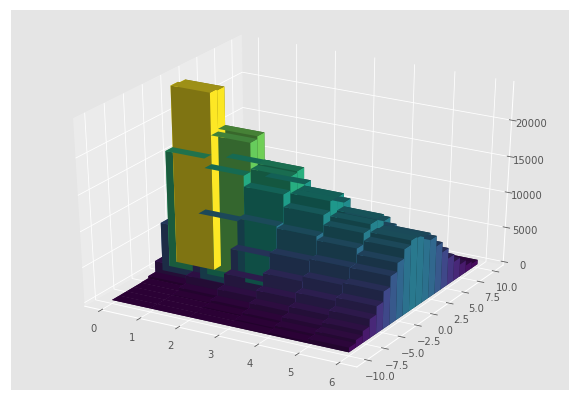

In [196]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#
# Assuming you have "2D" dataset like the following that you need
# to plot.
#

#
# Convert it into an numpy array.
#
data_array = np.array(data_2d).T
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0])-10 )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
dz=z_data
offset = dz + np.abs(dz.min())
from matplotlib import cm
import matplotlib.colors as colors
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.viridis(norm(fracs))

# plt.colormaps()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data, color=colors )
#
# Finally, display the plot.
#


layer0/input/act (272, 32, 32, 3) 0.0 0.0335706637443 0.0705345615859
layer1/batchnormalization/act (272, 32, 32, 32) 0.0346720600754 0.262138601065 2.11571485381
layer1/conv2d/act (272, 32, 32, 32) 0.000203185759717 0.0617651864185 0.580776953199
layer2/batchnormalization/act (272, 32, 32, 32) 0.039034689415 0.280320040933 4.43099435242
layer2/conv2d/act (272, 32, 32, 32) 0.0363666539653 0.439465987931 8.61907644836
layer3/batchnormalization/act (272, 16, 16, 64) 0.0576623208305 0.229626096151 1.9178249716
layer3/conv2d/act (272, 16, 16, 64) 0.0572536144771 0.400144468097 4.02278031306
layer4/batchnormalization/act (272, 16, 16, 64) 0.0728889600852 0.437848273597 2.64463362026
layer4/conv2d/act (272, 16, 16, 64) 0.0725276595024 0.475360455804 2.78715655509
layer5/dense/act (272, 512) 0.168100159283 0.744757613246 3.15892374817
layer6/dense/act (272, 10) 0.537510164762 1.7946381729 13.3171753667
layer6/softmax/act (272, 10) 0.000119253006594 0.0526046360582 0.347997478972


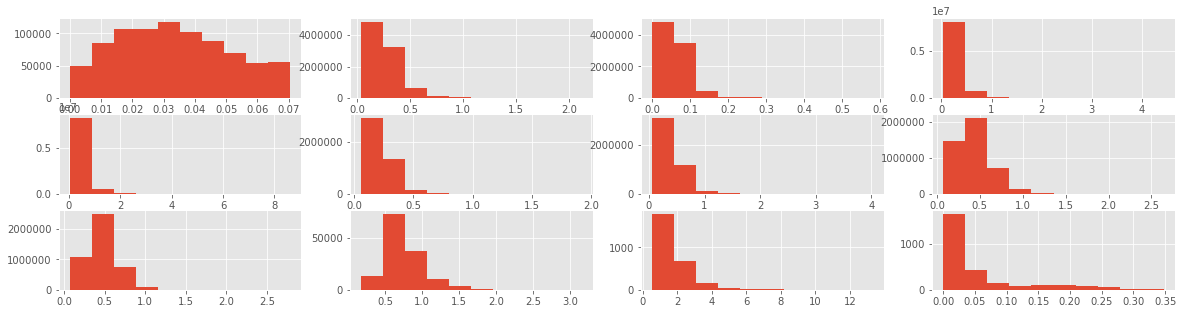

In [242]:
fig,axes= plt.subplots(3,4,figsize=(20,5)) 
axes=axes.ravel()
ind=0
for name,series in arr.iteritems():
    tensor= series.iloc[0]
    if 'act' not in name: continue
    print name,tensor.shape,tensor.min(),tensor.mean(),tensor.max()
    axes[ind].hist(tensor.flatten())
    ind+=1

layer0/input/act (272, 32, 32, 3) 0.0 0.0335706637443 0.0705345615859
layer1/batchnormalization/act (272, 32, 32, 32) 0.0346720600754 0.262138601065 2.11571485381
layer1/conv2d/act (272, 32, 32, 32) 0.000203185759717 0.0617651864185 0.580776953199
layer2/batchnormalization/act (272, 32, 32, 32) 0.039034689415 0.280320040933 4.43099435242
layer2/conv2d/act (272, 32, 32, 32) 0.0363666539653 0.439465987931 8.61907644836
layer3/batchnormalization/act (272, 16, 16, 64) 0.0576623208305 0.229626096151 1.9178249716
layer3/conv2d/act (272, 16, 16, 64) 0.0572536144771 0.400144468097 4.02278031306
layer4/batchnormalization/act (272, 16, 16, 64) 0.0728889600852 0.437848273597 2.64463362026
layer4/conv2d/act (272, 16, 16, 64) 0.0725276595024 0.475360455804 2.78715655509
layer5/dense/act (272, 512) 0.168100159283 0.744757613246 3.15892374817
layer6/dense/act (272, 10) 0.537510164762 1.7946381729 13.3171753667
layer6/softmax/act (272, 10) 0.000119253006594 0.0526046360582 0.347997478972


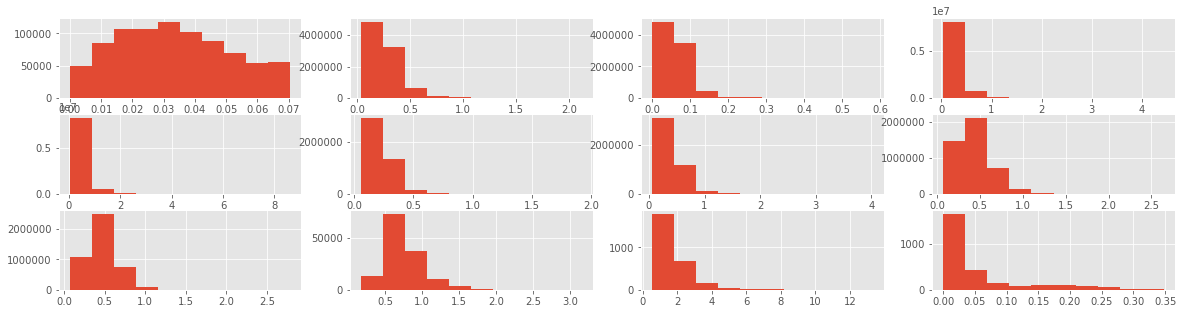

In [251]:
fig,axes= plt.subplots(3,4,figsize=(20,5)) 
axes=axes.ravel()
ind=0
for name,series in arr.iteritems():
    tensor= series.iloc[0]
    if 'act' not in name: continue
    print name,tensor.shape,tensor.min(),tensor.mean(),tensor.max()
    axes[ind].hist(tensor.flatten())
    ind+=1